In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
from sklearn.impute import KNNImputer

In [9]:
KNN_imputer = KNNImputer(n_neighbors=1)
data['Age'] = KNN_imputer.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data['Cabin'].isna().sum()

687

In [12]:
687/891*100

77.10437710437711

In [13]:
# 컬럼 내 결측값이 전체 데이터의 50% 넘으니까 Cabin 지우기
data = data.drop('Cabin', axis=1)

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
data['Embarked'] = data['Embarked'].fillna("S")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

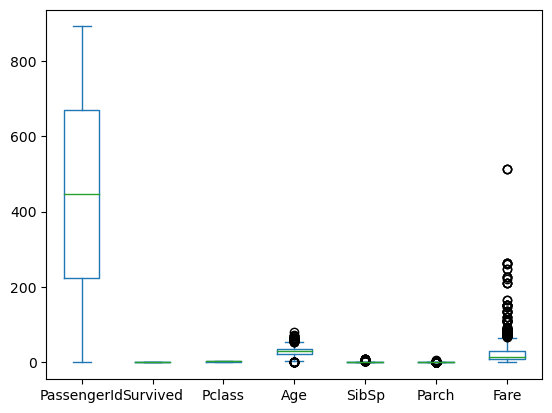

In [21]:
data.plot(kind='box')

In [22]:
# 아웃라이어를 계산하는 함수
def outlier(x):
    x = x.describe()
    out_max = x.loc['75%'] + (1.5 * (x.loc['75%'] - x.loc['25%']))
    out_min = x.loc['25%'] - (1.5 * (x.loc['75%'] - x.loc['25%']))
    ol_result = pd.DataFrame([out_max, out_min], columns=out_max.index, index=['상한값', '하한값'])
    result = pd.concat([x, ol_result])
    return result

In [23]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000


In [24]:
data[data['Fare'] > 65.634400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


In [25]:
# 파생변수 만들기
data['family'] = data['SibSp'] + data['Parch'] + 1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [26]:
data['adj_fare'] = data['Fare'] / data['family']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,8.05000


In [27]:
outlier(data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family,adj_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,19.916375
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,7.250000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,8.300000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200
상한값,1336.000000,2.500000,4.500000,54.500000,2.500000,0.000000,65.634400,3.500000,48.291667
하한값,-444.000000,-1.500000,0.500000,2.500000,-1.500000,0.000000,-26.724000,-0.500000,-17.375000


In [28]:
data[data['adj_fare'] == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,adj_fare
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,1,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1,512.3292


In [29]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family', 'adj_fare'],
      dtype='object')

In [30]:
# 생존확률에 필요한 데이터만 다시 셋팅
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'family']]
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,2
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,1


In [31]:
# 데이터 더미변수화 시키기
data = pd.get_dummies(data, drop_first=True)

In [32]:
data.head()

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,2,1,0,1
1,1,1,38.0,2,0,0,0
2,1,3,26.0,1,0,0,1
3,1,1,35.0,2,0,0,1
4,0,3,35.0,1,1,0,1


In [33]:
# 훈련용데이터, 검증용데이터 나누기
from sklearn.model_selection import train_test_split

In [34]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
# 모델 1 의사결정나무
from sklearn.tree import DecisionTreeClassifier
model1_dtc = DecisionTreeClassifier(max_depth = 5, random_state=10)
model1_dtc.fit(X_train, y_train)
pred1_dtc = model1_dtc.predict(X_test)

In [38]:
print(accuracy_score(y_test, pred1_dtc))
print(confusion_matrix(y_test, pred1_dtc))
print(classification_report(y_test, pred1_dtc))

0.8212290502793296
[[103  14]
 [ 18  44]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       117
           1       0.76      0.71      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



앙상블 분석방법

In [39]:
# 모델 2 앙상블_배깅
from sklearn.ensemble import BaggingClassifier
model2_bcf = BaggingClassifier(n_estimators=1000, n_jobs=-1, random_state = 10)
model2_bcf.fit(X_train, y_train)
pred2_bcf = model2_bcf.predict(X_test)

In [40]:
print(accuracy_score(y_test, pred2_bcf))
print(confusion_matrix(y_test, pred2_bcf))
print(classification_report(y_test, pred2_bcf))

0.8324022346368715
[[102  15]
 [ 15  47]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.76      0.76      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [41]:
# 모델 3 앙상블_부스팅(에이다부스트)
from sklearn.ensemble import AdaBoostClassifier
model3_ada = AdaBoostClassifier(n_estimators = 1000, random_state=10)
model3_ada.fit(X_train, y_train)
pred3_ada = model3_ada.predict(X_test)

In [42]:
print(accuracy_score(y_test, pred3_ada))
print(confusion_matrix(y_test, pred3_ada))
print(classification_report(y_test, pred3_ada))

0.8268156424581006
[[98 19]
 [12 50]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       117
           1       0.72      0.81      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



In [43]:
# 모델 4 앙상블_부스팅(그래디언트부스트)
from sklearn.ensemble import GradientBoostingClassifier
model4_gbc = GradientBoostingClassifier(n_estimators = 1000, random_state=10)
model4_gbc.fit(X_train, y_train)
pred4_gbc = model4_gbc.predict(X_test)

In [44]:
print(accuracy_score(y_test, pred4_gbc))
print(confusion_matrix(y_test, pred4_gbc))
print(classification_report(y_test, pred4_gbc))

0.8156424581005587
[[99 18]
 [15 47]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.72      0.76      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [45]:
model4_gbc = GradientBoostingClassifier(learning_rate=0.01,n_estimators = 10000, random_state=10)
model4_gbc.fit(X_train, y_train)
pred4_gbc = model4_gbc.predict(X_test)
print(accuracy_score(y_test, pred4_gbc))
print(confusion_matrix(y_test, pred4_gbc))
print(classification_report(y_test, pred4_gbc))

0.8156424581005587
[[100  17]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       117
           1       0.73      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [46]:
# 모델 5 앙상블_부스팅(XG부스트)
from xgboost import XGBClassifier
model5_xgb = XGBClassifier(n_estimators=1000,n_jobs=-1,learning_rate=0.01,random_state=10)
model5_xgb.fit(X_train, y_train)
pred5_xgb = model5_xgb.predict(X_test)

In [47]:
print(accuracy_score(y_test, pred5_xgb))
print(confusion_matrix(y_test, pred5_xgb))
print(classification_report(y_test, pred5_xgb))

0.8491620111731844
[[104  13]
 [ 14  48]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       117
           1       0.79      0.77      0.78        62

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



In [48]:
# 모델 6 앙상블_부스팅(라이트 GBM)
from lightgbm import LGBMClassifier
model6_lgbm = LGBMClassifier(n_estimators=1000, n_jobs=-1, learning_rate=0.01, random_state=10)
model6_lgbm.fit(X_train, y_train)
pred6_lgbm = model6_lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 280, number of negative: 432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393258 -> initscore=-0.433636
[LightGBM] [Info] Start training from score -0.433636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [49]:
print(accuracy_score(y_test, pred6_lgbm))
print(confusion_matrix(y_test, pred6_lgbm))
print(classification_report(y_test, pred6_lgbm))

0.8268156424581006
[[104  13]
 [ 18  44]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.71      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.83      0.82       179



In [50]:
# 모델 7 앙상블_랜덤배깅(Random Forest)
from sklearn.ensemble import RandomForestClassifier
model7_rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=10)
model7_rfc.fit(X_train, y_train)
pred7_rfc = model7_rfc.predict(X_test)

In [51]:
print(accuracy_score(y_test, pred7_rfc))
print(confusion_matrix(y_test, pred7_rfc))
print(classification_report(y_test, pred7_rfc))

0.8268156424581006
[[102  15]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       117
           1       0.75      0.74      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [52]:
# 모델 8 앙상블_(ExtraTreesClassifier)
from sklearn.ensemble import ExtraTreesClassifier
model8_etc = ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=10)
model8_etc.fit(X_train, y_train)
pred8_etc = model8_etc.predict(X_test)

In [53]:
print(accuracy_score(y_test, pred8_etc))
print(confusion_matrix(y_test, pred8_etc))
print(classification_report(y_test, pred8_etc))

0.8156424581005587
[[102  15]
 [ 18  44]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       117
           1       0.75      0.71      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179



스케일 분석방법

In [54]:
# 로버스터스케일_RobustScaler
from sklearn.preprocessing import RobustScaler
rs_scaler = RobustScaler()
X_scaled = rs_scaler.fit_transform(X)

In [55]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [56]:
X_scaled

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0.0,-0.592240,1.0,0.0,0.0,0.0
1,-2.0,0.638529,1.0,-1.0,0.0,-1.0
2,0.0,-0.284548,0.0,-1.0,0.0,0.0
3,-2.0,0.407760,1.0,-1.0,0.0,0.0
4,0.0,0.407760,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
886,-1.0,-0.207624,0.0,0.0,0.0,0.0
887,-2.0,-0.823009,0.0,-1.0,0.0,0.0
888,0.0,0.000000,3.0,-1.0,0.0,0.0
889,-2.0,-0.284548,0.0,0.0,0.0,-1.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [58]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [59]:
print(accuracy_score(y_test,pred_lr))
print(classification_report(y_test, pred_lr))
print(confusion_matrix(y_test,pred_lr))

0.8212290502793296
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       117
           1       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

[[102  15]
 [ 17  45]]


하이퍼파라미터 튜닝

In [60]:
# 위에서 스케일링한 홀드아웃
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [61]:
# from xgboost import XGBClassifier
xgb_mx = XGBClassifier(max_depth = 3, n_estimators= 500, n_jobs=-1, learning_rate=0.05, random_state=10)
xgb_mx.fit(X_train, y_train)
pred_xgb_mx = xgb_mx.predict(X_test)
print(accuracy_score(y_test, pred_xgb_mx))
print(classification_report(y_test, pred_xgb_mx))

0.8379888268156425
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       117
           1       0.79      0.73      0.76        62

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



In [62]:
# 랜덤서치
from sklearn.model_selection import RandomizedSearchCV
params = dict(max_depth=[3,5,10],n_estimators=[100,500,1000],learning_rate=[0.01,0.05,0.1])
params

{'max_depth': [3, 5, 10],
 'n_estimators': [100, 500, 1000],
 'learning_rate': [0.01, 0.05, 0.1]}

In [63]:
rand_cv = RandomizedSearchCV(xgb_mx, param_distributions=params, n_iter=30, cv=5, n_jobs=-1, verbose=3)
rand_cv.fit(X_train,y_train)
rand_pred = rand_cv.predict(X_test)

print(sorted(rand_cv.cv_results_.keys()))
print('최적하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고예측 정확도:{rand_cv.best_score_:.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\hi\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=30. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적하이퍼 파라미터:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05}
최고예측 정확도:0.8300


In [64]:
# from xgboost import XGBClassifier
xgb_mx = XGBClassifier(n_estimators= 100,max_depth= 5, learning_rate= 0.05, n_jobs=-1, random_state=10)
xgb_mx.fit(X_train, y_train)
pred_xgb_mx = xgb_mx.predict(X_test)
print(accuracy_score(y_test, pred_xgb_mx))
print(classification_report(y_test, pred_xgb_mx))

0.8379888268156425
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.78      0.74      0.76        62

    accuracy                           0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

